# FAKE REVIEW NODE EMBEDDING

In [644]:
!pip install stellargraph

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [645]:
# importing all necessary libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import os
import networkx as nx
import stellargraph as sg
from stellargraph import StellarGraph
from sklearn import preprocessing, model_selection
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
#from node2vec import Node2Vec as n2v
sns.set()

%matplotlib inline

In [646]:
#importing libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import statistics
import math
import os
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import confusion_matrix
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

import re
pd.set_option('max_colwidth', 800)


#importing Libraies
import networkx as nx
import matplotlib.pyplot as plt
from numpy import genfromtxt
import collections
from collections import OrderedDict

import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.linear_model import LinearRegression,LogisticRegression, RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report,accuracy_score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [647]:
#loading dataset
df=pd.read_csv('/content/newdataset.csv')
df.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,...,80,0,8,0,1,6,4,0,5,Yes
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,...,80,1,10,3,3,10,7,1,7,No
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,...,80,0,7,3,3,0,0,0,0,Yes
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,...,80,0,8,3,3,8,7,3,0,No
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,...,80,1,6,3,3,2,2,2,2,No


In [648]:
df.shape

(1470, 35)

In [649]:
d = []
for i in range(1470):
    s = i+1
    d.append(s)

In [650]:
d

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185

In [651]:
df.insert(0, 'Index', d)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,80,0,8,0,1,6,4,0,5,Yes
1,2,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,No
2,3,37,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,Yes
3,4,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,80,0,8,3,3,8,7,3,0,No
4,5,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,No


In [652]:
df.shape

(1470, 36)

In [653]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [654]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,720,47,Travel_Rarely,955,Sales,4,2,Life Sciences,1,1003,...,80,0,9,0,3,9,0,0,7,No
1,1131,35,Travel_Rarely,750,Research & Development,28,3,Life Sciences,1,1596,...,80,2,10,3,2,10,9,6,8,No
2,1250,29,Travel_Rarely,428,Sales,9,3,Marketing,1,1752,...,80,0,2,3,3,2,2,2,2,Yes
3,271,55,Travel_Rarely,452,Research & Development,1,3,Medical,1,374,...,80,0,37,2,3,36,10,4,13,No
4,150,19,Travel_Rarely,1181,Research & Development,3,1,Medical,1,201,...,80,0,1,3,3,1,0,0,0,No


In [655]:
df.isnull().sum()

Index                       0
Age                         0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0cedeeb490>,
      dtype=object)

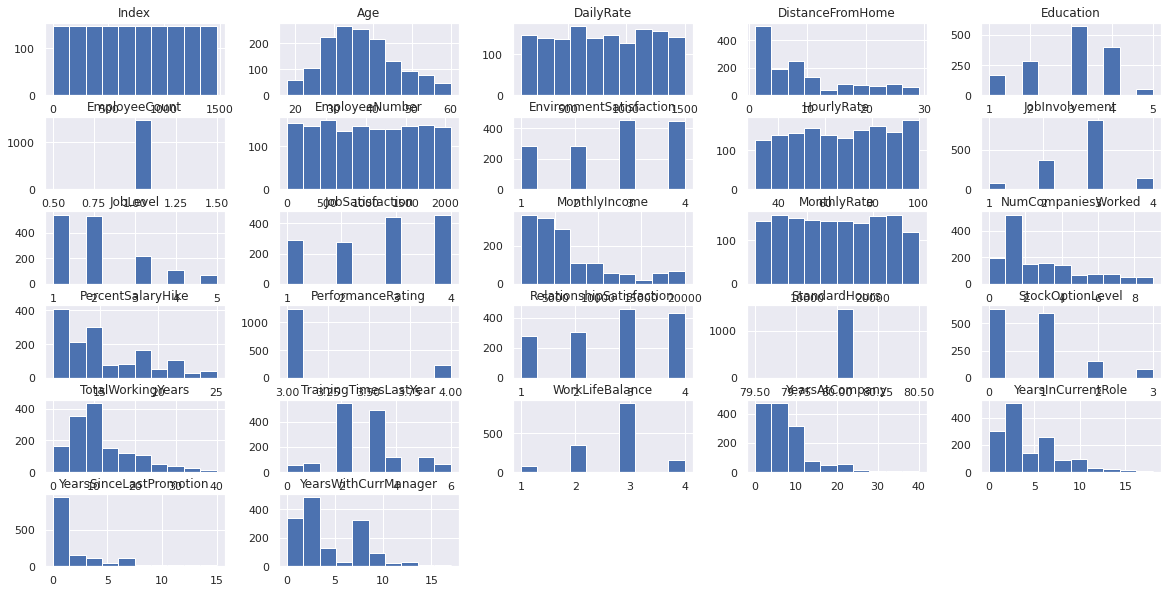

In [656]:
df.hist(figsize=(20,10))

In [657]:
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,720,47,Travel_Rarely,955,Sales,4,2,Life Sciences,1,1003,...,80,0,9,0,3,9,0,0,7,No
1,1131,35,Travel_Rarely,750,Research & Development,28,3,Life Sciences,1,1596,...,80,2,10,3,2,10,9,6,8,No
2,1250,29,Travel_Rarely,428,Sales,9,3,Marketing,1,1752,...,80,0,2,3,3,2,2,2,2,Yes
3,271,55,Travel_Rarely,452,Research & Development,1,3,Medical,1,374,...,80,0,37,2,3,36,10,4,13,No
4,150,19,Travel_Rarely,1181,Research & Development,3,1,Medical,1,201,...,80,0,1,3,3,1,0,0,0,No


In [658]:
feat_cat=[feature for feature in df.columns if df[feature].dtype =='O']
feat_cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime',
 'Attrition']

In [659]:
ordinal_label=df['BusinessTravel'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Travel_Rarely': 0, 'Travel_Frequently': 1, 'Non-Travel': 2}

In [660]:
df['BusinessTravel']=df['BusinessTravel'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,720,47,0,955,Sales,4,2,Life Sciences,1,1003,...,80,0,9,0,3,9,0,0,7,No
1,1131,35,0,750,Research & Development,28,3,Life Sciences,1,1596,...,80,2,10,3,2,10,9,6,8,No
2,1250,29,0,428,Sales,9,3,Marketing,1,1752,...,80,0,2,3,3,2,2,2,2,Yes
3,271,55,0,452,Research & Development,1,3,Medical,1,374,...,80,0,37,2,3,36,10,4,13,No
4,150,19,0,1181,Research & Development,3,1,Medical,1,201,...,80,0,1,3,3,1,0,0,0,No


In [661]:
ordinal_label=df['Department'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Research & Development': 0, 'Sales': 1, 'Human Resources': 2}

In [662]:
df['Department']=df['Department'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,720,47,0,955,1,4,2,Life Sciences,1,1003,...,80,0,9,0,3,9,0,0,7,No
1,1131,35,0,750,0,28,3,Life Sciences,1,1596,...,80,2,10,3,2,10,9,6,8,No
2,1250,29,0,428,1,9,3,Marketing,1,1752,...,80,0,2,3,3,2,2,2,2,Yes
3,271,55,0,452,0,1,3,Medical,1,374,...,80,0,37,2,3,36,10,4,13,No
4,150,19,0,1181,0,3,1,Medical,1,201,...,80,0,1,3,3,1,0,0,0,No


In [663]:
ordinal_label=df['EducationField'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Life Sciences': 0,
 'Medical': 1,
 'Marketing': 2,
 'Technical Degree': 3,
 'Other': 4,
 'Human Resources': 5}

In [664]:
df['EducationField']=df['EducationField'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,720,47,0,955,1,4,2,0,1,1003,...,80,0,9,0,3,9,0,0,7,No
1,1131,35,0,750,0,28,3,0,1,1596,...,80,2,10,3,2,10,9,6,8,No
2,1250,29,0,428,1,9,3,2,1,1752,...,80,0,2,3,3,2,2,2,2,Yes
3,271,55,0,452,0,1,3,1,1,374,...,80,0,37,2,3,36,10,4,13,No
4,150,19,0,1181,0,3,1,1,1,201,...,80,0,1,3,3,1,0,0,0,No


In [665]:
ordinal_label=df['Gender'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Male': 0, 'Female': 1}

In [666]:
df['Gender']=df['Gender'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,720,47,0,955,1,4,2,0,1,1003,...,80,0,9,0,3,9,0,0,7,No
1,1131,35,0,750,0,28,3,0,1,1596,...,80,2,10,3,2,10,9,6,8,No
2,1250,29,0,428,1,9,3,2,1,1752,...,80,0,2,3,3,2,2,2,2,Yes
3,271,55,0,452,0,1,3,1,1,374,...,80,0,37,2,3,36,10,4,13,No
4,150,19,0,1181,0,3,1,1,1,201,...,80,0,1,3,3,1,0,0,0,No


In [667]:
ordinal_label=df['JobRole'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Sales Executive': 0,
 'Research Scientist': 1,
 'Laboratory Technician': 2,
 'Manufacturing Director': 3,
 'Healthcare Representative': 4,
 'Manager': 5,
 'Sales Representative': 6,
 'Research Director': 7,
 'Human Resources': 8}

In [668]:
df['JobRole']=df['JobRole'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,720,47,0,955,1,4,2,0,1,1003,...,80,0,9,0,3,9,0,0,7,No
1,1131,35,0,750,0,28,3,0,1,1596,...,80,2,10,3,2,10,9,6,8,No
2,1250,29,0,428,1,9,3,2,1,1752,...,80,0,2,3,3,2,2,2,2,Yes
3,271,55,0,452,0,1,3,1,1,374,...,80,0,37,2,3,36,10,4,13,No
4,150,19,0,1181,0,3,1,1,1,201,...,80,0,1,3,3,1,0,0,0,No


In [669]:
ordinal_label=df['MaritalStatus'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Married': 0, 'Single': 1, 'Divorced': 2}

In [670]:
df['MaritalStatus']=df['MaritalStatus'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,720,47,0,955,1,4,2,0,1,1003,...,80,0,9,0,3,9,0,0,7,No
1,1131,35,0,750,0,28,3,0,1,1596,...,80,2,10,3,2,10,9,6,8,No
2,1250,29,0,428,1,9,3,2,1,1752,...,80,0,2,3,3,2,2,2,2,Yes
3,271,55,0,452,0,1,3,1,1,374,...,80,0,37,2,3,36,10,4,13,No
4,150,19,0,1181,0,3,1,1,1,201,...,80,0,1,3,3,1,0,0,0,No


In [671]:
ordinal_label=df['Over18'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'Y': 0}

In [672]:
df['Over18']=df['Over18'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,720,47,0,955,1,4,2,0,1,1003,...,80,0,9,0,3,9,0,0,7,No
1,1131,35,0,750,0,28,3,0,1,1596,...,80,2,10,3,2,10,9,6,8,No
2,1250,29,0,428,1,9,3,2,1,1752,...,80,0,2,3,3,2,2,2,2,Yes
3,271,55,0,452,0,1,3,1,1,374,...,80,0,37,2,3,36,10,4,13,No
4,150,19,0,1181,0,3,1,1,1,201,...,80,0,1,3,3,1,0,0,0,No


In [673]:
ordinal_label=df['OverTime'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'No': 0, 'Yes': 1}

In [674]:
df['OverTime']=df['OverTime'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,720,47,0,955,1,4,2,0,1,1003,...,80,0,9,0,3,9,0,0,7,No
1,1131,35,0,750,0,28,3,0,1,1596,...,80,2,10,3,2,10,9,6,8,No
2,1250,29,0,428,1,9,3,2,1,1752,...,80,0,2,3,3,2,2,2,2,Yes
3,271,55,0,452,0,1,3,1,1,374,...,80,0,37,2,3,36,10,4,13,No
4,150,19,0,1181,0,3,1,1,1,201,...,80,0,1,3,3,1,0,0,0,No


In [675]:
ordinal_label=df['Attrition'].value_counts().to_dict()
g={k:i for i,k in enumerate(ordinal_label, 0)}
g

{'No': 0, 'Yes': 1}

In [676]:
df['Attrition']=df['Attrition'].map(g)
df.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,720,47,0,955,1,4,2,0,1,1003,...,80,0,9,0,3,9,0,0,7,0
1,1131,35,0,750,0,28,3,0,1,1596,...,80,2,10,3,2,10,9,6,8,0
2,1250,29,0,428,1,9,3,2,1,1752,...,80,0,2,3,3,2,2,2,2,1
3,271,55,0,452,0,1,3,1,1,374,...,80,0,37,2,3,36,10,4,13,0
4,150,19,0,1181,0,3,1,1,1,201,...,80,0,1,3,3,1,0,0,0,0


In [677]:
df1 = df.sort_values(by=['Index'], ascending=True)
df1.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
187,1,41,0,1102,1,1,2,0,1,1,...,80,0,8,0,1,6,4,0,5,1
13,2,49,1,279,0,8,1,0,1,2,...,80,1,10,3,3,10,7,1,7,0
1269,3,37,0,1373,0,2,2,4,1,4,...,80,0,7,3,3,0,0,0,0,1
89,4,33,1,1392,0,3,4,0,1,5,...,80,0,8,3,3,8,7,3,0,0
893,5,27,0,591,0,2,1,1,1,7,...,80,1,6,3,3,2,2,2,2,0


In [678]:
df1.reset_index(drop=True, inplace=True)

In [679]:
df1.head()

,Index,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,1,41,0,1102,1,1,2,0,1,1,...,80,0,8,0,1,6,4,0,5,1
1,2,49,1,279,0,8,1,0,1,2,...,80,1,10,3,3,10,7,1,7,0
2,3,37,0,1373,0,2,2,4,1,4,...,80,0,7,3,3,0,0,0,0,1
3,4,33,1,1392,0,3,4,0,1,5,...,80,0,8,3,3,8,7,3,0,0
4,5,27,0,591,0,2,1,1,1,7,...,80,1,6,3,3,2,2,2,2,0


In [680]:
df1.reset_index(drop=True, inplace=True)

In [681]:
df1.drop(['Index'], axis=1, inplace=True)

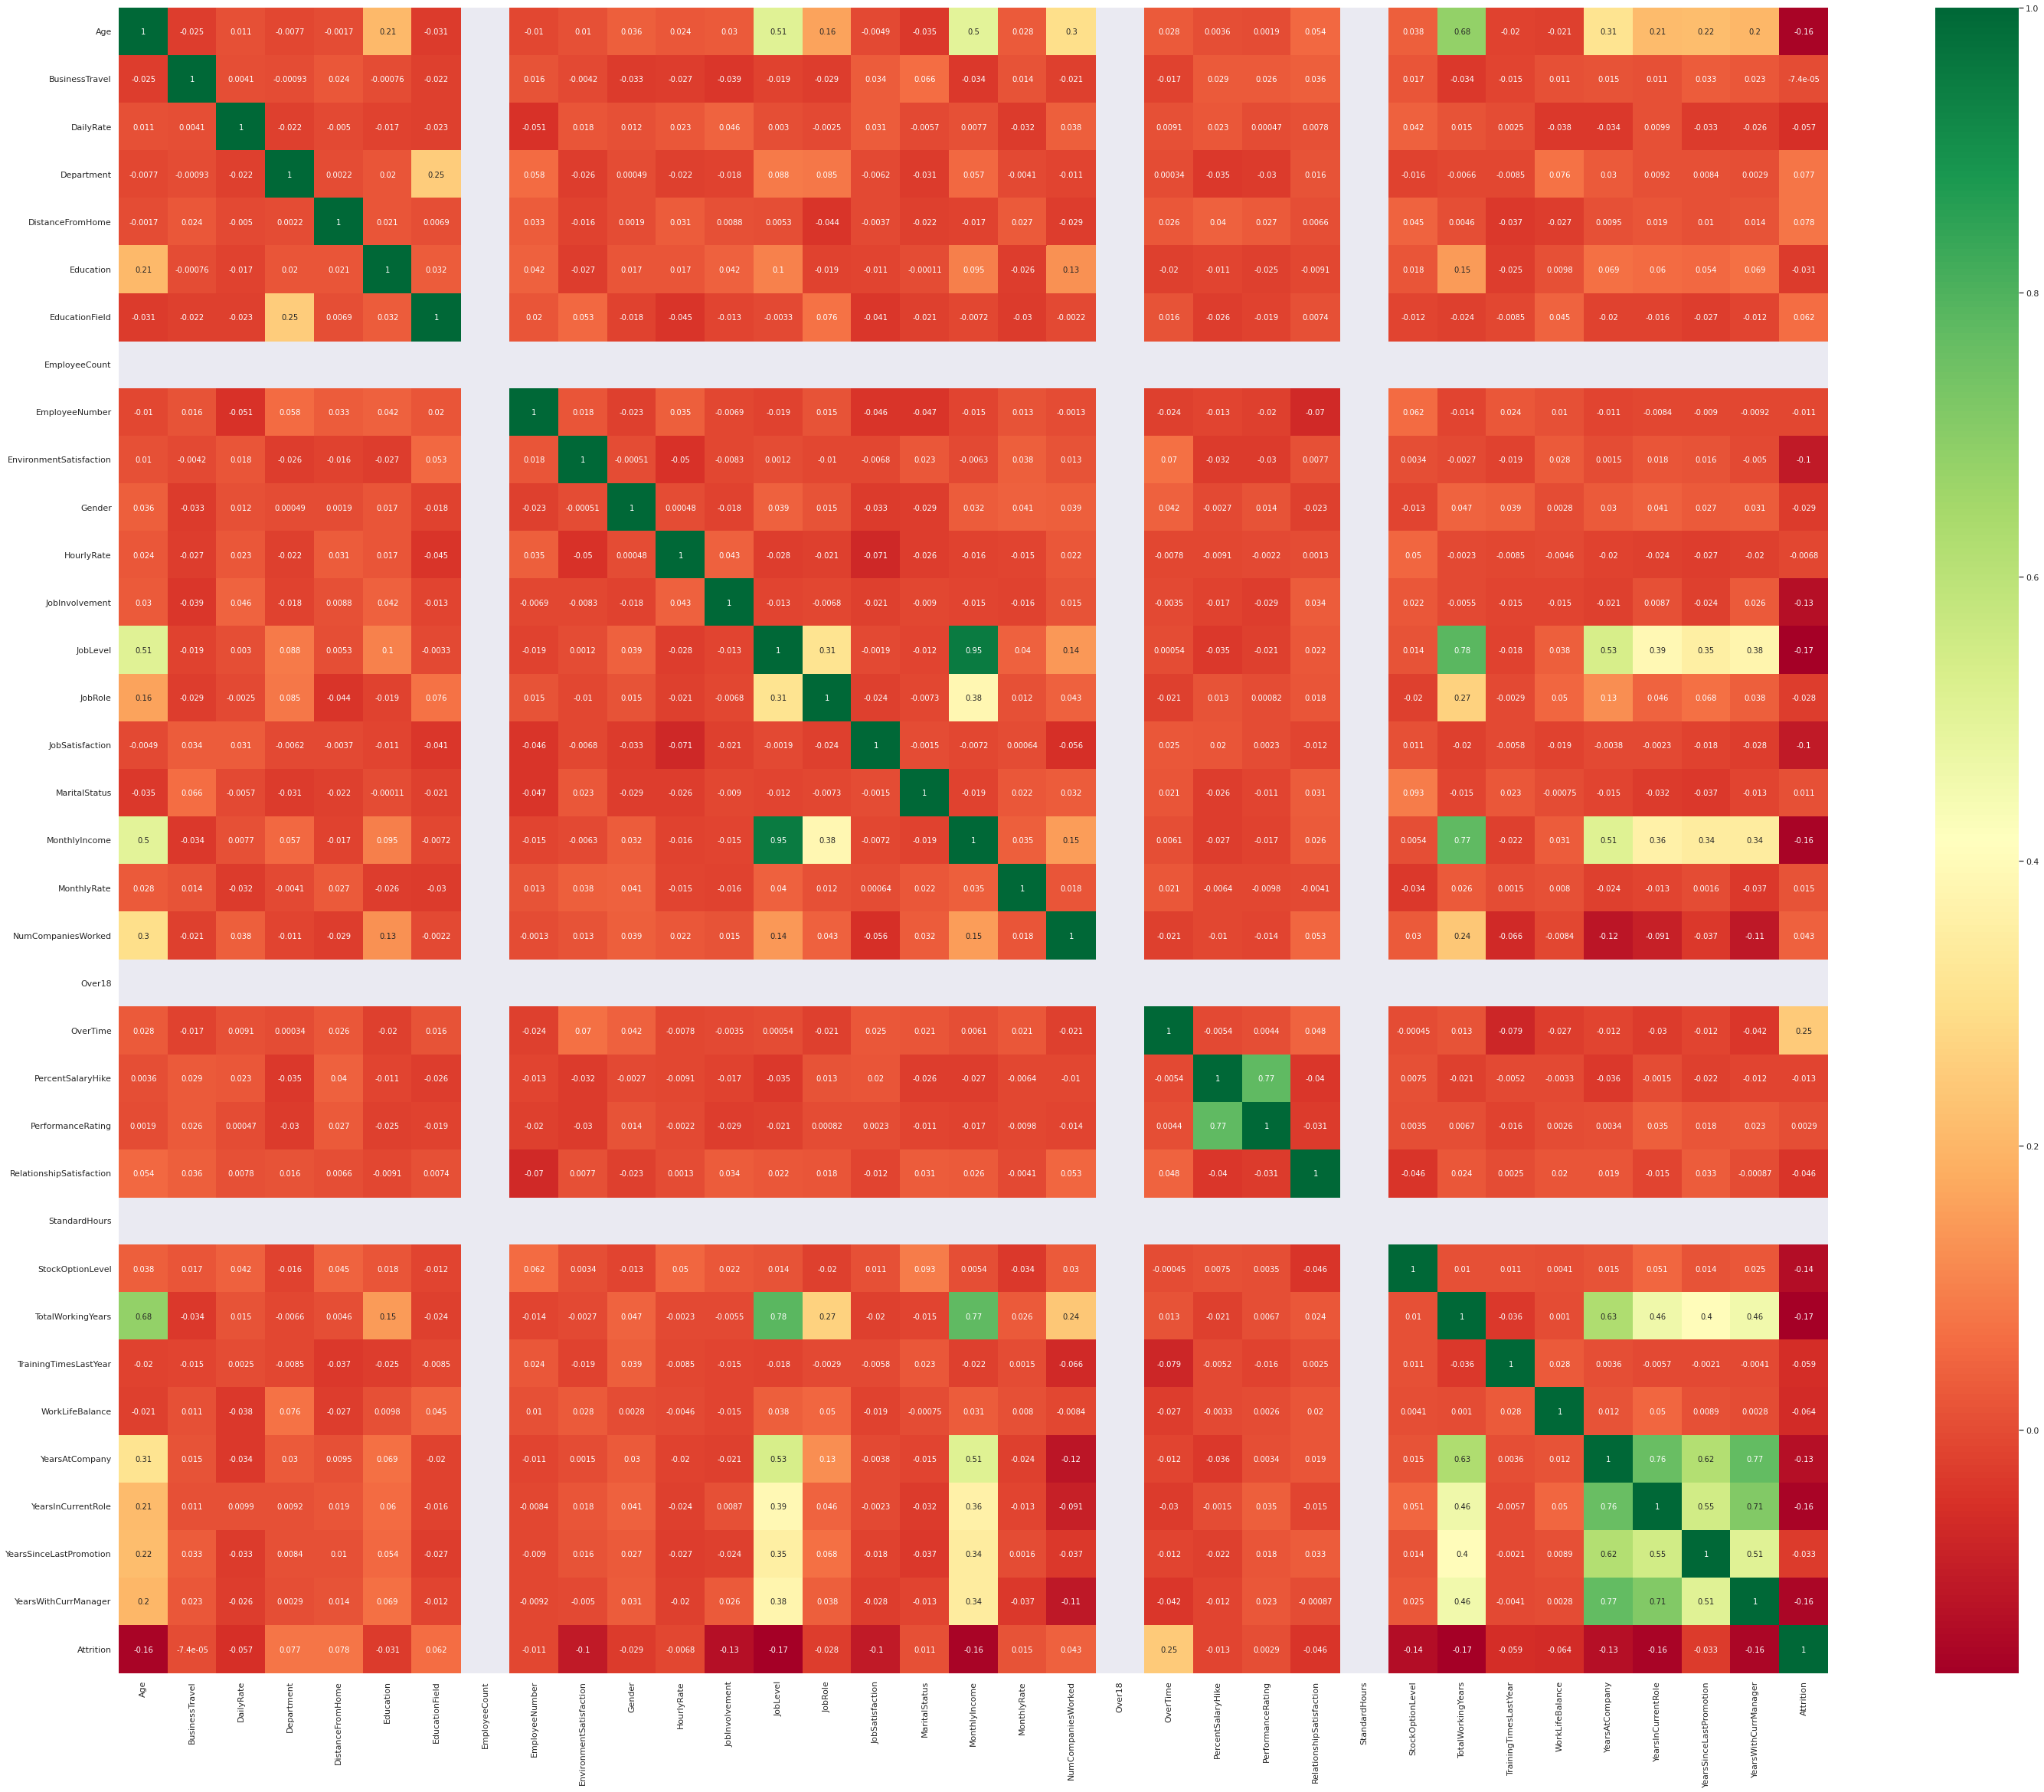

In [682]:
plt.figure(figsize = (50,40))
sns.heatmap(df1.corr(), cmap = "RdYlGn", annot = True)

In [683]:
scale_data=[feature for feature in df1.columns if feature not in ['Attrition']]
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df1[scale_data]=scaler.fit_transform(df1[scale_data])
df1.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,0.547619,0.0,0.715820,0.5,0.000000,0.25,0.0,0.0,0.000000,0.333333,...,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,1
1,0.738095,0.5,0.126700,0.0,0.250000,0.00,0.0,0.0,0.000484,0.666667,...,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0
2,0.452381,0.0,0.909807,0.0,0.035714,0.25,0.8,0.0,0.001451,1.000000,...,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,1
3,0.357143,0.5,0.923407,0.0,0.071429,0.75,0.0,0.0,0.001935,1.000000,...,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0
4,0.214286,0.0,0.350036,0.0,0.035714,0.00,0.2,0.0,0.002903,0.000000,...,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0


In [684]:
u3 = df1.drop(['Attrition'], axis = 1)
u3.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.0,0.715820,0.5,0.000000,0.25,0.0,0.0,0.000000,0.333333,...,0.000000,0.0,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.5,0.126700,0.0,0.250000,0.00,0.0,0.0,0.000484,0.666667,...,1.000000,0.0,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,0.0,0.909807,0.0,0.035714,0.25,0.8,0.0,0.001451,1.000000,...,0.333333,0.0,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.5,0.923407,0.0,0.071429,0.75,0.0,0.0,0.001935,1.000000,...,0.666667,0.0,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.0,0.350036,0.0,0.035714,0.00,0.2,0.0,0.002903,0.000000,...,1.000000,0.0,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [685]:
from scipy.spatial.distance import cdist
s = cdist(u3, u3, 'euclid')
s

array([[0.        , 2.90106829, 2.0829746 , ..., 2.62496882, 2.61751638,
        2.45157261],
       [2.90106829, 0.        , 2.62039624, ..., 2.25428594, 1.97556032,
        2.42289955],
       [2.0829746 , 2.62039624, 0.        , ..., 2.40266495, 2.26773337,
        2.14776924],
       ...,
       [2.62496882, 2.25428594, 2.40266495, ..., 0.        , 2.40602545,
        1.82206588],
       [2.61751638, 1.97556032, 2.26773337, ..., 2.40602545, 0.        ,
        1.90258654],
       [2.45157261, 2.42289955, 2.14776924, ..., 1.82206588, 1.90258654,
        0.        ]])

In [686]:
X1=pd.DataFrame(s)
X1

,0,1,2,3,4,5,6,7,8,9,...,1460,1461,1462,1463,1464,1465,1466,1467,1468,1469
0,0.000000,2.901068,2.082975,1.990395,2.460054,2.198560,2.346969,2.728009,2.867858,2.298548,...,2.587961,2.709682,2.425933,2.863639,2.776033,2.668620,2.792917,2.624969,2.617516,2.451573
1,2.901068,0.000000,2.620396,2.437835,2.031625,1.949957,2.524119,1.983110,1.535105,2.237889,...,2.665499,2.725383,2.797464,2.212214,2.611384,2.124897,2.130945,2.254286,1.975560,2.422900
2,2.082975,2.620396,0.000000,2.054726,2.215463,1.854551,2.341530,2.179679,2.499158,2.092955,...,2.528722,2.308769,2.875645,2.480970,2.451258,2.316897,2.397818,2.402665,2.267733,2.147769
3,1.990395,2.437835,2.054726,0.000000,2.364184,1.820953,2.267287,2.587775,2.521258,2.253481,...,2.337924,2.612870,2.651273,2.587804,2.163003,2.277175,2.522617,2.586033,2.155023,2.322519
4,2.460054,2.031625,2.215463,2.364184,0.000000,2.004433,2.729116,2.464900,2.535479,1.945049,...,2.663368,2.698514,2.750771,2.331514,2.483042,1.922886,2.106373,2.491555,2.151672,1.995037
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,2.668620,2.124897,2.316897,2.277175,1.922886,1.779482,2.778341,2.144658,2.050492,1.768427,...,2.167462,2.238704,2.118746,1.859529,2.096507,0.000000,1.856933,2.201272,1.655297,1.465485
1466,2.792917,2.130945,2.397818,2.522617,2.106373,2.204001,2.724045,2.475431,2.191774,2.034133,...,2.105197,2.029442,2.221994,1.925722,2.271316,1.856933,0.000000,2.373096,1.742307,1.708765
1467,2.624969,2.254286,2.402665,2.586033,2.491555,2.447270,2.190197,2.380420,2.220935,2.538526,...,2.518748,2.492175,2.743540,1.985534,2.778090,2.201272,2.373096,0.000000,2.406025,1.822066
1468,2.617516,1.975560,2.267733,2.155023,2.151672,1.676630,2.847753,2.567784,2.208964,2.129168,...,2.012013,2.185232,2.297033,1.743389,1.977298,1.655297,1.742307,2.406025,0.000000,1.902587


In [687]:
B=np.matrix(X1)
G=nx.from_numpy_matrix(B)

In [688]:
#calculating the mean
mn=np.array(X1)
m=np.nanmean(mn)

In [689]:
threshold = m
G.remove_edges_from([(n1, n2) for n1, n2, w in G.edges(data="weight") if w < threshold])
A=nx.to_numpy_matrix(G)
##Creating graph from adjacency matrix
H=nx.from_numpy_matrix(A)

In [690]:
from stellargraph import StellarGraph
graph1= StellarGraph.from_networkx(H)
print(graph1.info())

StellarGraph: Undirected multigraph
 Nodes: 1470, Edges: 544192

 Node types:
  default: [1470]
    Features: none
    Edge types: default-default->default

 Edge types:
    default-default->default: [544192]
        Weights: range=[2.30153, 3.94832], mean=2.58404, std=0.211973
        Features: none


In [691]:
from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph
from stellargraph import datasets
from IPython.display import display, HTML

%matplotlib inline

In [692]:
rw = BiasedRandomWalk(graph1)

walks = rw.run(
    nodes=list(graph1.nodes()),  # root nodes
    length=100,  # maximum length of a random walk
    n=10,  # number of random walks per root node
    p=0.5,  # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0,  # Defines (unormalised) probability, 1/q, for moving away from source node
)
print("Number of random walks: {}".format(len(walks)))
from gensim.models import Word2Vec

str_walks = [[str(n) for n in walk] for walk in walks]
model = Word2Vec(str_walks, size=128, window=5, min_count=0, sg=1, workers=2, iter=1)

Number of random walks: 14700


In [694]:
node_Class = df1["Attrition"]

In [695]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs

node_embeddings = (
    model.wv.vectors
)  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = node_Class[[int(node_id) for node_id in node_ids]]

In [696]:
node_emb=pd.DataFrame(node_embeddings)

In [697]:
node_tar=pd.DataFrame(node_targets)
node_targets=node_tar.sort_index()

In [698]:
node_emb['Class']=node_targets

In [699]:
node_emb

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,Class
0,0.213244,0.042172,0.087043,-0.013332,-0.032530,-0.087214,-0.100959,-0.097309,-0.050079,0.071318,...,0.049500,-0.081183,0.002343,-0.013814,0.048706,-0.033605,0.013297,-0.089136,0.050559,1
1,0.209227,0.036389,0.083169,0.002970,-0.035955,-0.086864,-0.107408,-0.088699,-0.059813,0.072315,...,0.049443,-0.077547,-0.006435,-0.012301,0.051151,-0.032113,0.029590,-0.081926,0.062557,0
2,0.205367,0.036644,0.066590,-0.014667,-0.030603,-0.071764,-0.115484,-0.100575,-0.077167,0.083011,...,0.037216,-0.073430,-0.008243,-0.000712,0.070089,-0.031705,0.026603,-0.087644,0.050550,1
3,0.210079,0.031891,0.088862,-0.004089,-0.037089,-0.086137,-0.097026,-0.102732,-0.049807,0.067913,...,0.043439,-0.085096,0.000797,-0.008118,0.053655,-0.031546,0.018244,-0.082180,0.057259,0
4,0.210195,0.041135,0.076242,-0.009683,-0.030200,-0.080998,-0.101657,-0.100492,-0.054812,0.081171,...,0.041570,-0.075552,-0.008777,-0.007362,0.051765,-0.026339,0.022532,-0.088280,0.056817,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.208213,0.019327,0.114891,-0.042541,-0.018970,-0.115668,-0.034369,-0.109647,0.002521,-0.001160,...,0.083596,-0.073594,0.008953,-0.039985,-0.023737,-0.021724,-0.007233,-0.072063,0.046641,0
1466,0.209942,0.024237,0.118780,-0.044517,-0.024712,-0.118192,-0.029743,-0.104569,0.010378,0.001277,...,0.086455,-0.069880,0.012402,-0.036502,-0.026606,-0.028043,-0.004041,-0.067879,0.043742,0
1467,0.209256,0.018537,0.116678,-0.045149,-0.017195,-0.116089,-0.036755,-0.109256,-0.000233,0.005970,...,0.085879,-0.076188,0.008987,-0.033389,-0.021400,-0.021174,0.000618,-0.073157,0.049342,0
1468,0.215973,0.016138,0.108355,-0.037018,-0.021675,-0.109064,-0.036700,-0.106646,-0.003210,0.011422,...,0.081657,-0.076005,0.006067,-0.035018,-0.018880,-0.026518,-0.006701,-0.069830,0.048995,0


In [700]:
X=node_emb.drop(['Class'],axis=1)
Y=node_emb['Class']

In [701]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import classification_report,accuracy_score
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn import metrics

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score
import seaborn as sns

### CROSS VALIDATION

In [702]:
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
cv = KFold(n_splits=10, random_state=1, shuffle=True)
kf = KFold(n_splits=10)

In [703]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC()
scores = cross_val_score(lsvm, X, Y, cv=cv, n_jobs=-1)
print(np.mean(scores))

0.8387755102040815


In [704]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa=PassiveAggressiveClassifier(max_iter=1000, random_state=7, tol=1e-3)
scores = cross_val_score(pa, X, Y, cv=cv, n_jobs=-1)
print(np.mean(scores))

0.7687074829931972


In [705]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(max_iter=10000) 
scores = cross_val_score(log, X, Y, cv=cv, n_jobs=-1)
print(np.mean(scores))

0.8387755102040815


In [706]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300)
scores = cross_val_score(rf, X, Y, cv=cv, n_jobs=-1)
print(np.mean(scores))

0.8387755102040815


In [707]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, 
              gamma=0,  importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, 
             n_estimators=200, n_jobs=16,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, subsample=1,
              tree_method='exact', use_label_encoder=False
              )
scores = cross_val_score(xgbc, X, Y, cv=cv, n_jobs=-1)
print(np.mean(scores))

0.8340136054421767


### Baseline models

In [708]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=7, stratify=Y)

In [709]:
from sklearn.linear_model import PassiveAggressiveClassifier
pa=PassiveAggressiveClassifier(max_iter=1000, random_state=7, tol=1e-3)
pa.fit(x_train, y_train)
y_pred=pa.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[  4 243]
 [  0  47]]
              precision    recall  f1-score   support

           0       1.00      0.02      0.03       247
           1       0.16      1.00      0.28        47

    accuracy                           0.17       294
   macro avg       0.58      0.51      0.16       294
weighted avg       0.87      0.17      0.07       294

accuracy_score:  0.17346938775510204


In [710]:
from sklearn.svm import LinearSVC
lsvm = LinearSVC()
lsvm.fit(x_train, y_train)
y_pred=lsvm.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[247   0]
 [ 47   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

accuracy_score:  0.8401360544217688


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [711]:
rf = RandomForestClassifier(n_estimators=300)
rf.fit(x_train, y_train)
y_pred=rf.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[247   0]
 [ 47   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

accuracy_score:  0.8401360544217688


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [712]:
xgbc = xgb.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, 
              gamma=0,  importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, 
             n_estimators=200, n_jobs=16,
              num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, subsample=1,
              tree_method='exact', use_label_encoder=False
              )
xgbc.fit(x_train, y_train)
y_pred=xgbc.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[244   3]
 [ 47   0]]
              precision    recall  f1-score   support

           0       0.84      0.99      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.83       294
   macro avg       0.42      0.49      0.45       294
weighted avg       0.70      0.83      0.76       294

accuracy_score:  0.8299319727891157


In [713]:
log = LogisticRegression(max_iter=10000) 
log.fit(x_train, y_train)
y_pred=log.predict(x_test)
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('accuracy_score: ', accuracy_score(y_test, y_pred))

[[247   0]
 [ 47   0]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91       247
           1       0.00      0.00      0.00        47

    accuracy                           0.84       294
   macro avg       0.42      0.50      0.46       294
weighted avg       0.71      0.84      0.77       294

accuracy_score:  0.8401360544217688


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
